In [ ]:
import pandas as pd
import numpy as np
import os
from env import host, username, password

In [ ]:
#import pydtaset iris
from pydataset import data

df_iris = data('iris')

In [ ]:
# print the first 3 rows
df_iris.head(3)

In [ ]:
# print the number of rows and columns (shape)
df_iris.shape

In [ ]:
# print the column names
df_iris.columns

In [ ]:
# print the data type of each column
df_iris.info()

In [ ]:
# print the summary statistics for each of the numeric variables. 
df_iris.describe().T

- Would you recommend rescaling the data based on these statistics?
    - Would not rescale based on the data being all in one measurement already (cm). 

# Exercise 2
Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails').head(100)

In [ ]:
df_excel_sample.shape

In [ ]:
df_excel_sample.shape[0]

In [ ]:
df_excel_sample

In [ ]:
# print the number of rows of your original dataframe
df_excel.shape

In [ ]:
# print the first 5 column names
for x in range (5):
    print(df_excel.columns[x])

In [ ]:
# print the column names that have a data type of object
coltypes = df_excel.dtypes

In [ ]:
# Can also pass a list of data types I want to include or exclude: ##

#TBD

In [ ]:
coltypes[coltypes.values == 'object']

In [ ]:
# compute the range for each of the numeric variables.
df_excel[['monthly_charges', 'contract_type']].min()

In [ ]:
# use select dtypes to get only numeric columns
df_excel.select_dtypes(include = ['int64', 'float64'])

In [ ]:
numeric = df_excel.select_dtypes(include = ['int64', 'float64'])
type(numeric)

In [ ]:
numeric_column_names = numeric.columns
numeric_column_names

In [ ]:
mins = df_excel[numeric_column_names].min()
mins

In [ ]:
# now for the max
maxes = df_excel[numeric_column_names].max()
maxes

In [ ]:
# Range for each numeric data column is the max minus the min
maxes - mins

# Exercise 3
Read the data from this google sheet into a dataframe, df_google

In [ ]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [ ]:
# print the first 3 rows
df_google.head(3)

In [ ]:
# print the number of rows and columns
df_google.shape

In [ ]:
# print the column names
df_google.columns

In [ ]:
# print the data type of each column
df_google.dtypes

In [ ]:
df_google.info()

In [ ]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

In [ ]:
# print the unique values for each of your categorical variables

# Survived has 0 and 1
df_google.Survived.unique()

In [ ]:
df_google.Survived.value_counts()

In [ ]:
# Pclass (passenger class) has 3. 1st, 2nd and 3rd class
df_google.Pclass.unique()

In [ ]:
df_google.Pclass.value_counts()

In [ ]:
# Sex has 2: male and female:
df_google.Sex.unique()

In [ ]:
df_google.Sex.value_counts()

In [ ]:
# Parch has 0, 1, 2, 3, 4, 5, 6
df_google.Parch.unique()

In [ ]:
df_google.Parch.value_counts()

In [ ]:
# Embarked (point of departure)
df_google.Embarked.unique()

In [ ]:
df_google.Embarked.value_counts()

In [ ]:
# Cabin has many categories
df_google.Cabin.unique()

In [ ]:
df_google.Cabin.value_counts()

In [ ]:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

# Exploratory Analysis
    - May 18, 2021
        - https://ds.codeup.com/classification/explore/

In [89]:
import pandas as pd
import numpy as np
import os
from env import host, username, password

In [90]:
import acquire
from acquire import new_iris_data
from acquire import get_iris_data

In [166]:
df = get_iris_data()

In [168]:
#dropping the species_id columns as they are only pointing to numbers, not categories
df = df.drop(columns = 'species_id')
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [170]:
type(df)

pandas.core.frame.DataFrame

In [175]:
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_name  150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [177]:
df.dtypes

species_name     object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [178]:
df.shape

(150, 5)

In [179]:
df.columns

Index(['species_name', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

In [180]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64', length=150)

In [181]:
# set up our environment: 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

train, validate, test = train_validate_test_split(df2, target='species_name')

In [182]:
# validate and test to be out-of-sample

train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

In [183]:
df2.dtypes

species_id        int64
species_name     object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- 1. Acquire, prepare & split your data.

In [184]:
# Split data into Train, Validate, Test

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [185]:
#validate and test to be out-of-sample

train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

In [211]:
train, validate, test = train_validate_test_split(df, target='species_name')
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


In [187]:
print(train.shape, validate.shape, test.shape)

(84, 5) (36, 5) (30, 5)


In [207]:
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


In [208]:
train.shape

(84, 5)

In [209]:
test.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
80,versicolor,5.5,2.4,3.8,1.1
45,setosa,4.8,3.0,1.4,0.3
144,virginica,6.7,3.3,5.7,2.5
110,virginica,6.5,3.2,5.1,2.0
38,setosa,4.4,3.0,1.3,0.2


In [212]:
test.shape

(30, 5)

In [213]:
validate.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
134,virginica,6.1,2.6,5.6,1.4
62,versicolor,6.0,2.2,4.0,1.0
98,versicolor,5.1,2.5,3.0,1.1
66,versicolor,5.6,3.0,4.5,1.5
121,virginica,5.6,2.8,4.9,2.0


- 2. Univariate Stats
    - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

Descriptive stats, frequencies, histograms

This is often done during prep prior to splitting into train/validate/test, but if it is not, then it should be done first here. Why? Outliers. Running tests that assume normalcy. Scale of each variable. General "getting to know" your data.

We will use explore_univariate(train, cat_vars, quant_vars) function that takes in a dataframe, a list of the names of the categorical variables, and a list of the names of the quantitative variables. For each of the categorical variables, a frequency table (count & percentage) and barplot of the frequencies is returned. For each of the quantitative variables, descriptive statistics, a histogram, and a boxplot are returned.

In [215]:
cat_vars = ['species_id', 'species_name']

In [216]:
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]

The helper file, explore.py, contains the detailed code that creates the functions we use here. The recommended process for going through this lesson is to understand the flow of exploratory analysis. Practice drawing conclusions and documenting them as you view the output charts and test statistics. Practice asking exploratory questions, and then use the helper functions to quickly answer those questions. Secondarily, work to understand the code in explore.py.

In [217]:
#dont have the explore.py file just yet - need to make on own eventually
#explore.explore_univariate(train, cat_vars, quant_vars)

<AxesSubplot:>

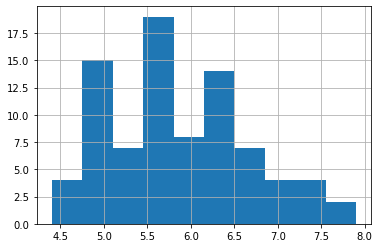

In [218]:
#histogram for sepal_length
train.sepal_length.hist()

<AxesSubplot:xlabel='sepal_length'>

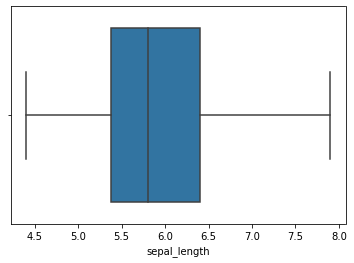

In [219]:
#boxplot for sepal_length
sns.boxplot(train.sepal_length)

<AxesSubplot:>

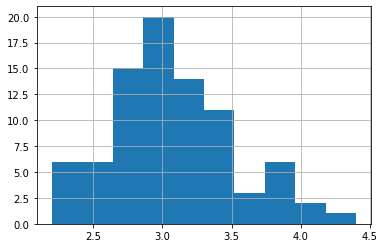

In [220]:
#histogram for sepal_width
train.sepal_width.hist()

<AxesSubplot:xlabel='sepal_width'>

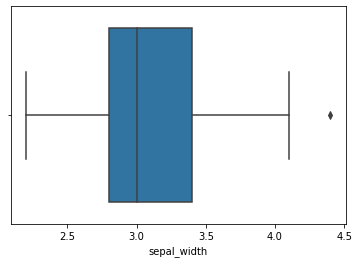

In [221]:
#boxplot for sepal_width
sns.boxplot(train.sepal_width)

<AxesSubplot:>

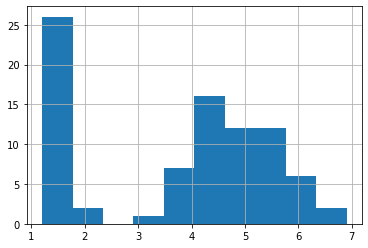

In [222]:
#histogram for petal_length
train.petal_length.hist()

<AxesSubplot:xlabel='petal_length'>

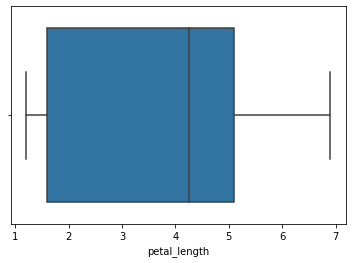

In [223]:
#boxplot for petal_length
sns.boxplot(train.petal_length)

<AxesSubplot:>

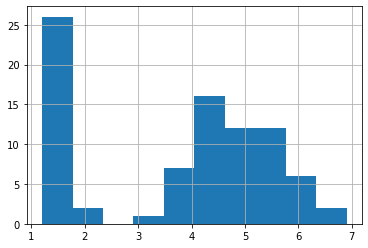

In [224]:
#histogram for pedal_width
train.petal_length.hist()

<AxesSubplot:xlabel='petal_length'>

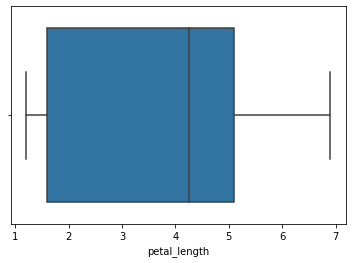

In [225]:
#boxplot for pedal_width
sns.boxplot(train.petal_length)

In [227]:
#computing descriptive statistics for each measurement type:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
    - cat_vars = ['species_id', 'species_name']

In [229]:
train.species_name.value_counts()

versicolor    28
virginica     28
setosa        28
Name: species_name, dtype: int64

<AxesSubplot:xlabel='species_name', ylabel='count'>

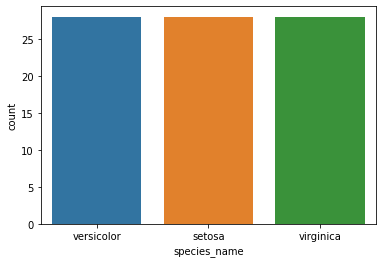

In [230]:
sns.countplot(x = 'species_name', data=train)

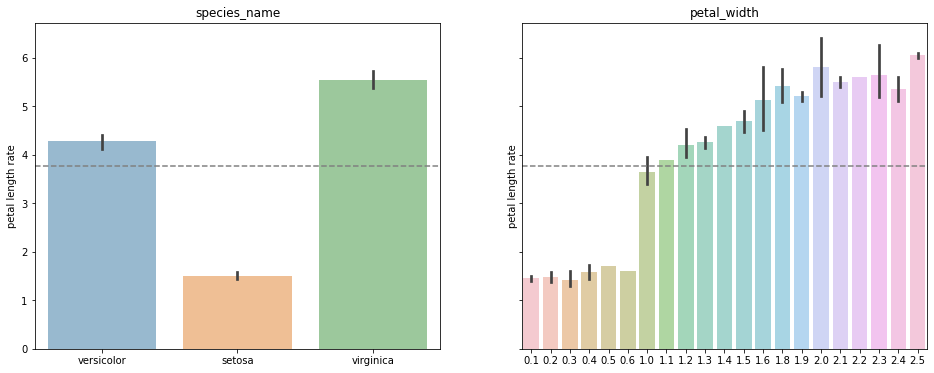

In [231]:
# barplot of categorical variables:

features = ['species_name', 'petal_width']

petal_length_rate = train.petal_length.mean()
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'petal_length', data=train,
               ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('petal length rate')
    ax[i].set_title(feature)
    ax[i].axhline(petal_length_rate, ls='--', color='grey')

- Document takeaways & any actions:
    - The train dataset splits the data into equal frequencies for the categorical variable. 
      - Sepal has outliers (wont be good for modeling)
      - Building a model would be best within the quantitative variables (petal_length, pedal_width)

# 3. Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

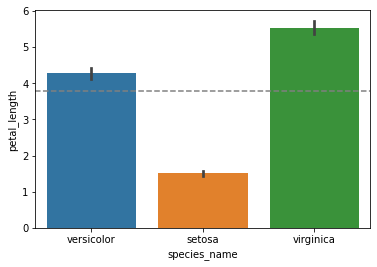

In [234]:
pl_mean = train.petal_length.mean()
p_length = sns.barplot(x = 'species_name', data=train, y='petal_length')
p_length.axhline(pl_mean, ls='--', color='grey')

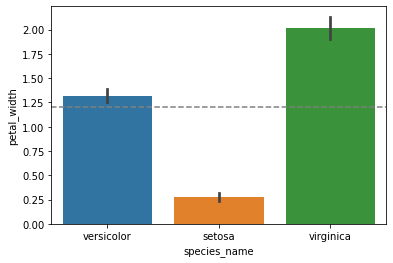

In [236]:
pw_mean = train.petal_width.mean()
p_width = sns.barplot(x='species_name', data=train, y='petal_width')
p_width.axhline(pw_mean, ls='--', color='grey')

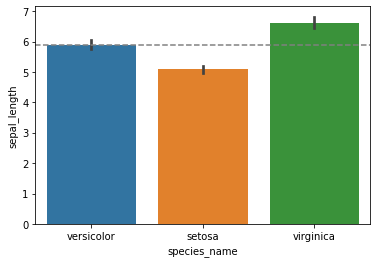

In [237]:
sepal_mean = train.sepal_length.mean()
s_length = sns.barplot(x='species_name', data=train, y='sepal_length')
s_length.axhline(sepal_mean, ls='--', color='grey')

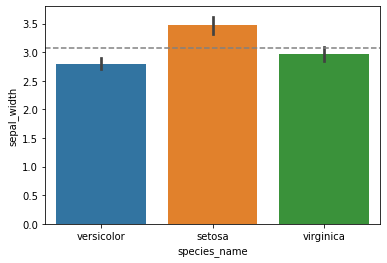

In [239]:
sw_mean = train.sepal_width.mean()
s_width = sns.barplot(x = 'species_name', data=train, y='sepal_width')
s_width.axhline(sw_mean, ls='--', color='grey')

- For each measurement type, compute the descriptive statistics for each species.

In [240]:
train.groupby(by=['species_name']).describe().T

species_name           setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.535714
             std     0.184448    0.409930   0.496815
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.525000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.275000    1.314286   2.021429
             std     0.120570    0.199470   0.293582
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.400000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [247]:
# create a dataframe of just the virginica flowers to compare later:
virgincia_df = train[train.species_name == 'virginica']
virgincia_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
133,virginica,6.3,2.8,5.1,1.5
139,virginica,6.9,3.1,5.4,2.1
115,virginica,6.4,3.2,5.3,2.3
145,virginica,6.7,3.0,5.2,2.3
125,virginica,7.2,3.2,6.0,1.8


In [244]:
#create a dataframe of just versicolor flowers to compare later: 
versicolor_df = train[train.species_name == 'versicolor']
versicolor_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
95,versicolor,5.7,3.0,4.2,1.2
91,versicolor,6.1,3.0,4.6,1.4
82,versicolor,5.8,2.7,3.9,1.2
52,versicolor,6.9,3.1,4.9,1.5


In [245]:
#Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups
#for sepal_length
U, p = stats.mannwhitneyu(virgincia_df.sepal_length, versicolor_df.sepal_length)
U, p

(107.5, 1.541014598267054e-06)

- There is a significant difference between the two groups for sepal length: 
   - difference = 107.5
   - p value = 1.5

In [249]:
#Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups
#for sepal_width
U, p = stats.mannwhitneyu(virgincia_df.sepal_width, versicolor_df.sepal_width)
U, p

(274.0, 0.026286295699228482)

- There is a significant difference between the two groups for sepal width:
    - difference = 274.0
    - p value = 0.026

In [255]:
#Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups
#for petal_length
U, p = stats.mannwhitneyu(virgincia_df.petal_length, versicolor_df.petal_length)
U, p

(7.5, 1.4739917857575313e-10)

- There is a significant difference between the two groups for petal width:
    - difference = 7.5
    - p value = 1.47

In [253]:
#Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups
#for petal_width
U, p = stats.mannwhitneyu(virgincia_df.petal_width, versicolor_df.petal_width)
U, p

(17.0, 3.235595834904965e-10)

- There is a significant difference between the two groups for petal length:
    - difference = 17
    - p value = 3.23

- Document takeaways & any actions
    - Petal length has the smallest difference at 7.5. which would be good to build a model as similar data sets and minimal outliers

# 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

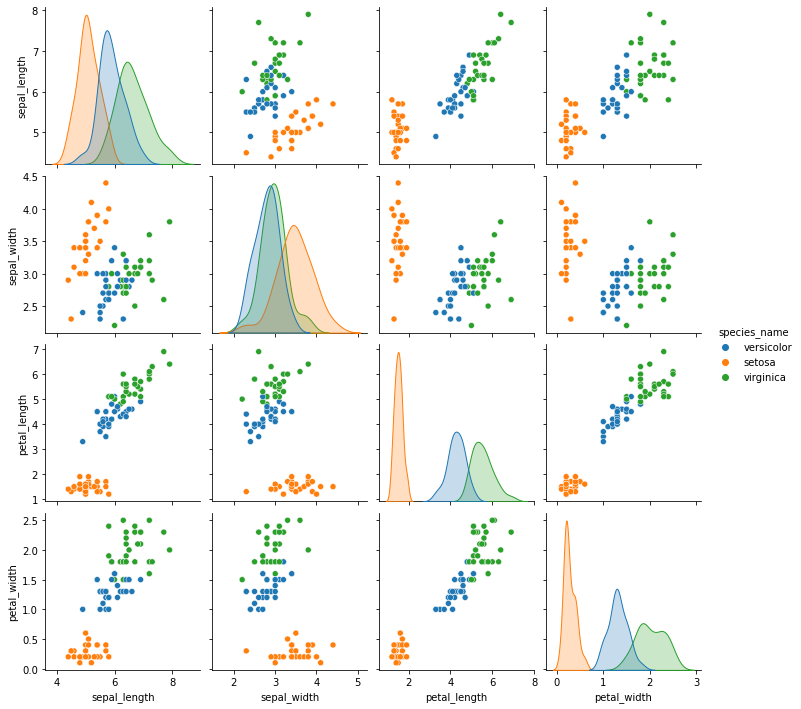

In [257]:
#Visualize the interaction of each measurement type with the others using a pairplot
sns.pairplot(train, hue = 'species_name')

- Create a swarmplot using a melted dataframe of all your numeric variables. 
    - The x-axis should be the variable name, the y-axis the measure.
    - Add another dimension using color to represent species. 
        - Document takeaways from this visualization.

In [259]:
# melt dataframe
# new columns species, attribute, measurement:

melted = pd.melt(train, id_vars = 'species_name', var_name = 'attribute', value_name = 'measurement')
melted.head()

,species_name,attribute,measurement
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


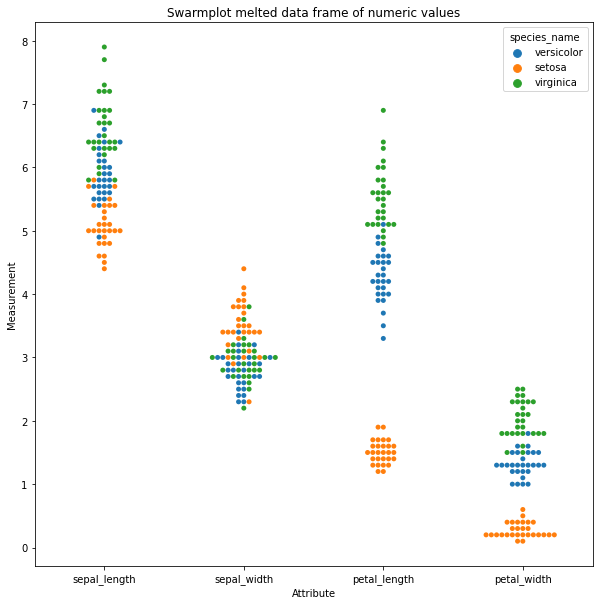

In [260]:
#create the swarm plot

plt.figure(figsize = (10, 10))
sns.swarmplot(data = melted, x = 'attribute', y = 'measurement', hue = 'species_name')
plt.title('Swarmplot melted data frame of numeric values')
plt.xlabel('Attribute')
plt.ylabel('Measurement')
plt.show()

- Takeaways from graph
     - Veriscolor is pretty well distributed and does not have a wide range of lengths
     - Setosa has a wide range of lengths

- Specific Question of the Data: 
    - Are petal lengths on setosa flowers shorter than virgincia flowers?
        - Compare means using a t test

In [262]:
## create dataframe for setosa
setosa_df = train[train.species == 'setosa']
setosa_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
36,setosa,5.5,3.5,1.3,0.2
18,setosa,5.7,3.8,1.7,0.3
20,setosa,5.4,3.4,1.7,0.2
31,setosa,5.4,3.4,1.5,0.4
6,setosa,4.6,3.4,1.4,0.3


In [271]:
setosa_df.petal_length.mean()

1.5071428571428573

In [272]:
virgincia_df.petal_length.mean()

5.535714285714285

- H0: Petal lenghts on setosa flowers == virgincia flowers
- Ha: Are petal lengths on setosa flowers != virgincial flowers 
    - Alpha = 0.5

In [275]:
stats.mannwhitneyu(x = setosa_df.petal_length,  y = virgincia_df.petal_length)

MannwhitneyuResult(statistic=0.0, pvalue=6.38157376517143e-11)